# notebook imports


In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor




# gather data

In [ ]:
california_housing_dataset = fetch_california_housing()

In [ ]:
# Make sure to run the cell above this one first to define california_housing_dataset
type(california_housing_dataset)

sklearn.utils._bunch.Bunch

In [ ]:
california_housing_dataset

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [ ]:
dir(california_housing_dataset)

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']

In [ ]:
print(california_housing_dataset.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce


## datapoints and features

In [ ]:
type(california_housing_dataset.data)

numpy.ndarray

In [ ]:
california_housing_dataset.data.shape

(20640, 8)

In [ ]:
california_housing_dataset.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [ ]:
california_housing_dataset.target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])


3 data exploration with pandas dataframes

In [ ]:
#create a pandas dataframe
data=pd.DataFrame(california_housing_dataset.data, columns=california_housing_dataset.feature_names)
#add column with price
data['price']=california_housing_dataset.target

In [ ]:
data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [ ]:
data.tail()  #rows at bottom sof dataframe look this

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847
20639,2.3886,16.0,5.254717,1.162264,1387.0,2.616981,39.37,-121.24,0.894


In [ ]:
data.count()

,0
MedInc,20640
HouseAge,20640
AveRooms,20640
AveBedrms,20640
Population,20640
AveOccup,20640
Latitude,20640
Longitude,20640
price,20640


# cleaning data check for missing values

In [ ]:
pd.isnull(data).any()

,0
MedInc,False
HouseAge,False
AveRooms,False
AveBedrms,False
Population,False
AveOccup,False
Latitude,False
Longitude,False
price,False


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


# visualizing data -histogram, distribution

In [ ]:
data['AveBedrms'].mean()

np.float64(1.096675149606208)

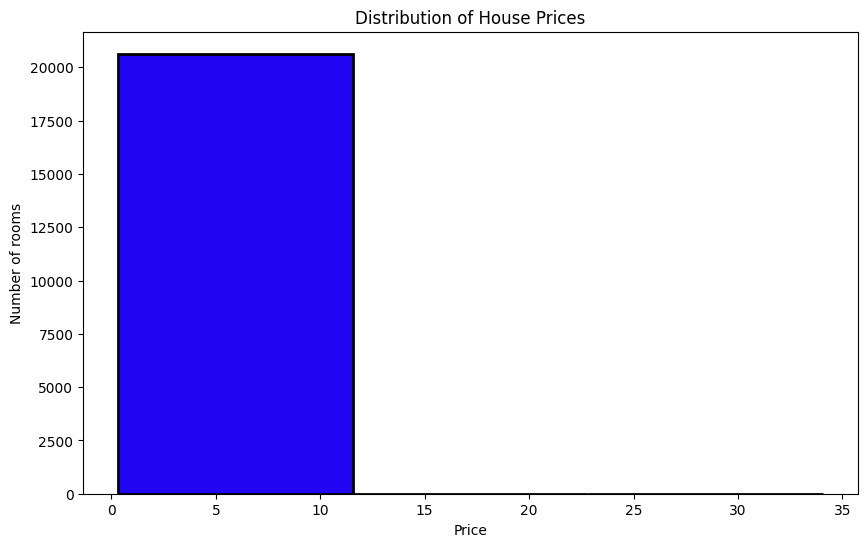

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(
    data['AveBedrms'],
    bins=3,
    edgecolor='black',   # border color
    linewidth=2,          # border thickness
    color='#2106f3'        # bar fill color
)
plt.xlabel('Price')
plt.ylabel('Number of rooms')
plt.title('Distribution of House Prices')
plt.show()


<Figure size 1000x600 with 0 Axes>

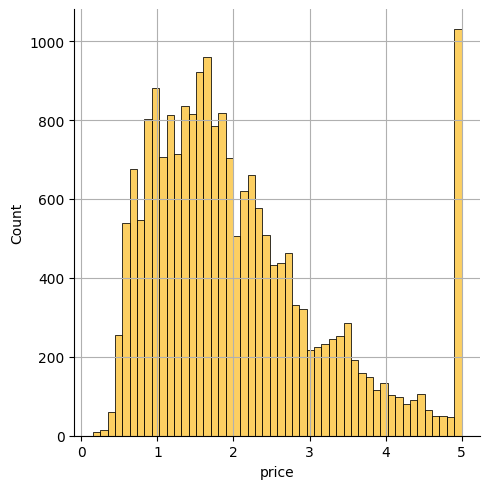

In [ ]:
plt.figure(figsize=(10, 6))
sns.displot(data['price'], bins=50, kde=False, color='#fbc02d')
plt.grid(True)
plt.show()

In [ ]:
frequency =data['AveBedrms'].value_counts()
type(frequency)

pandas.core.series.Series

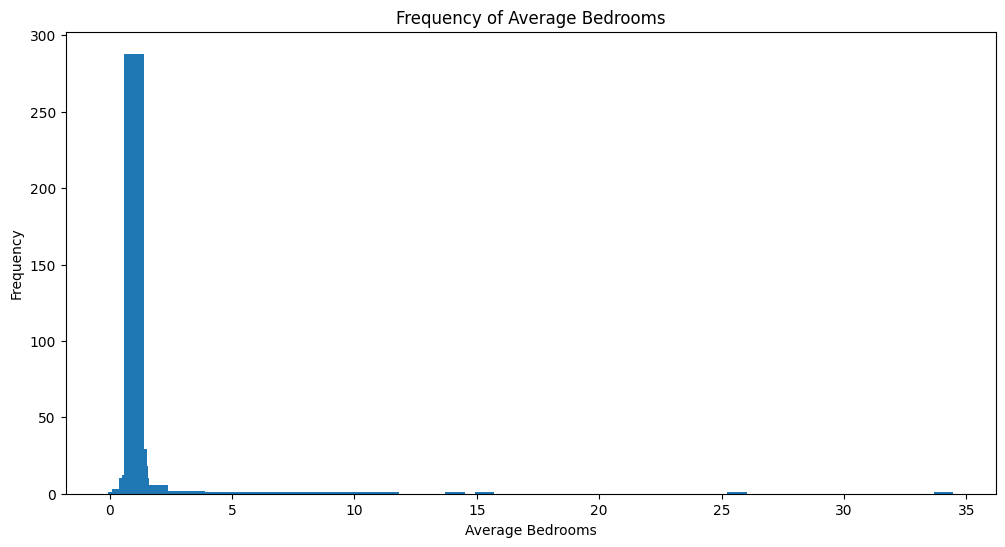

In [ ]:
plt.figure(figsize=(12, 6))
plt.bar(frequency.index, frequency.values)
plt.xlabel('Average Bedrooms')
plt.ylabel('Frequency')
plt.title('Frequency of Average Bedrooms')
plt.show()

In [ ]:
data['AveBedrms'].value_counts()

,count
AveBedrms,
1.000000,288
1.125000,29
1.058824,26
1.083333,25
1.100000,25
...,...
1.171920,1
0.971880,1
1.162264,1


# descriptive sttistics

In [ ]:
data['price'].min()

0.14999

In [ ]:
data['price'].max()

5.00001

In [ ]:
data.min()

,0
MedInc,0.499900
HouseAge,1.000000
AveRooms,0.846154
AveBedrms,0.333333
Population,3.000000
AveOccup,0.692308
Latitude,32.540000
Longitude,-124.350000
price,0.149990


In [ ]:
data.max()

,0
MedInc,15.000100
HouseAge,52.000000
AveRooms,141.909091
AveBedrms,34.066667
Population,35682.000000
AveOccup,1243.333333
Latitude,41.950000
Longitude,-114.310000
price,5.000010


In [ ]:
data.mean()

,0
MedInc,3.870671
HouseAge,28.639486
AveRooms,5.429000
AveBedrms,1.096675
Population,1425.476744
AveOccup,3.070655
Latitude,35.631861
Longitude,-119.569704
price,2.068558


In [ ]:
data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


## correlation
## $$ \rho_{XY}=corr(X,y) $$
## $$ -1.0 \leq \rho _{XY} \leq +1.0$$

In [ ]:
data['price'].corr(data['AveRooms'])

np.float64(0.15194828974145774)

# challenge calculte the corelation between property prices and the tupil teacher ration

In [ ]:
data['price'].corr(data['AveOccup'])

np.float64(-0.023737412956134345)

In [ ]:
data.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
price,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


In [ ]:
mask= np.zeros_like(data.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices]=True
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1.]])

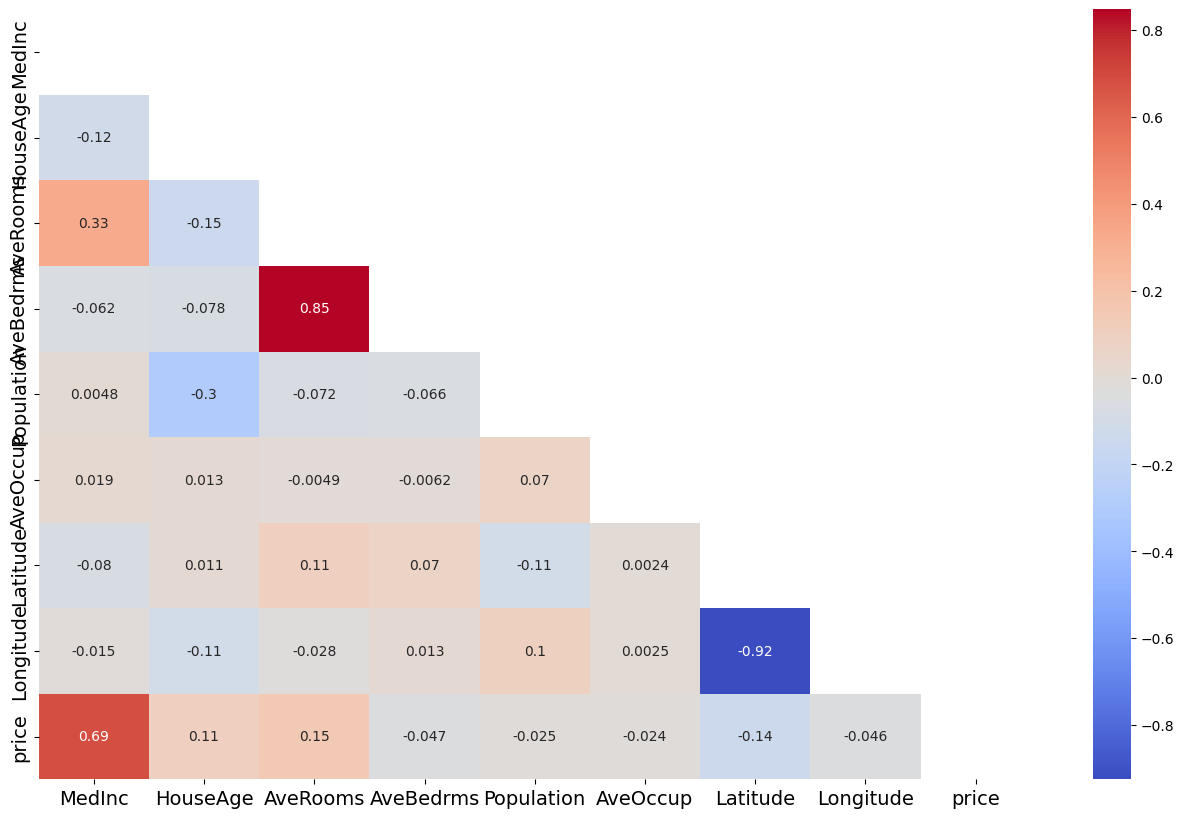

In [ ]:
plt.figure(figsize=(16, 10))
sns.heatmap(data.corr(),mask=mask,annot=True,annot_kws={"size":10},cmap='coolwarm')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()


3 challeng3 epicture the relationship between pollution and distance in your heas  then create a scattr plot between

Correlation between 'nox' and 'dis': -0.00485229499178133


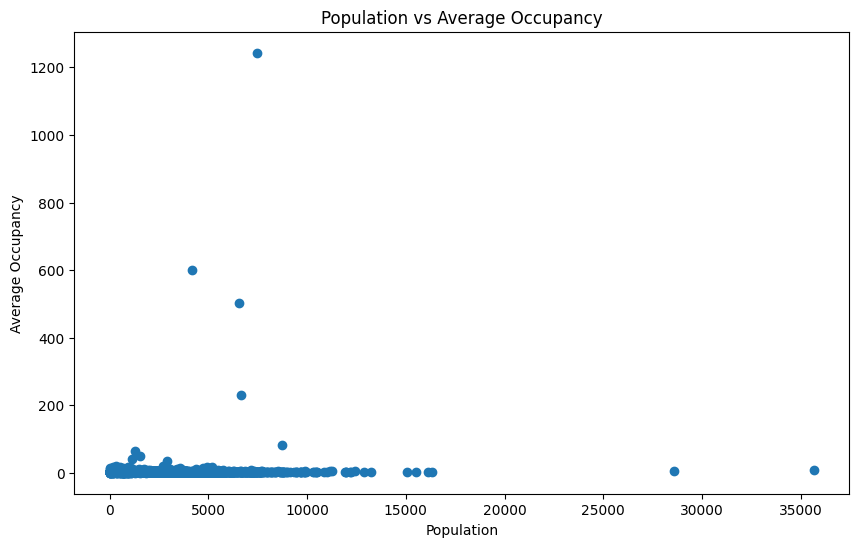

In [ ]:
nox_dis_corr = data['AveRooms'].corr(data['AveOccup'])
print("Correlation between 'nox' and 'dis':", nox_dis_corr)

plt.figure(figsize=(10, 6))
plt.title('Pollution vs Distance')
plt.xlabel('Pollution')
plt.ylabel('Distance')
plt.scatter(x=data['Population'],y=data['AveOccup'])
plt.xlabel('Population')
plt.ylabel('Average Occupancy')
plt.title('Population vs Average Occupancy')
plt.show()

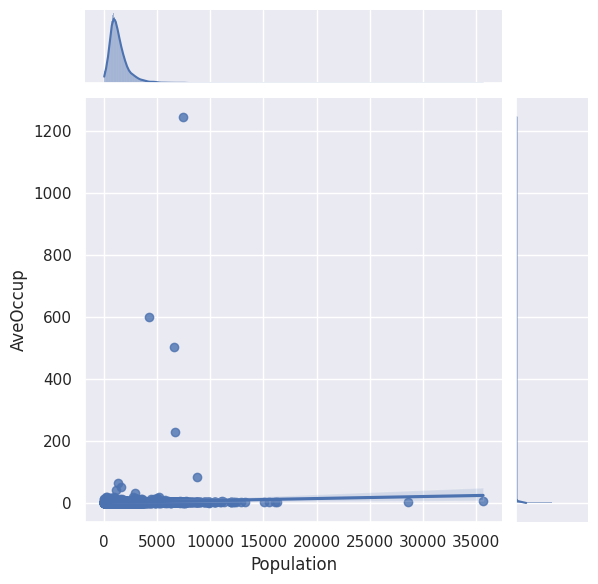

In [ ]:
sns.set()
sns.jointplot(x=data['Population'],y=data['AveOccup'],kind='reg')
plt.show()

In [ ]:
print(data.corr())

              MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
MedInc      1.000000 -0.119034  0.326895  -0.062040    0.004834  0.018766   
HouseAge   -0.119034  1.000000 -0.153277  -0.077747   -0.296244  0.013191   
AveRooms    0.326895 -0.153277  1.000000   0.847621   -0.072213 -0.004852   
AveBedrms  -0.062040 -0.077747  0.847621   1.000000   -0.066197 -0.006181   
Population  0.004834 -0.296244 -0.072213  -0.066197    1.000000  0.069863   
AveOccup    0.018766  0.013191 -0.004852  -0.006181    0.069863  1.000000   
Latitude   -0.079809  0.011173  0.106389   0.069721   -0.108785  0.002366   
Longitude  -0.015176 -0.108197 -0.027540   0.013344    0.099773  0.002476   
price       0.688075  0.105623  0.151948  -0.046701   -0.024650 -0.023737   

            Latitude  Longitude     price  
MedInc     -0.079809  -0.015176  0.688075  
HouseAge    0.011173  -0.108197  0.105623  
AveRooms    0.106389  -0.027540  0.151948  
AveBedrms   0.069721   0.013344 -0.046701  
Populatio

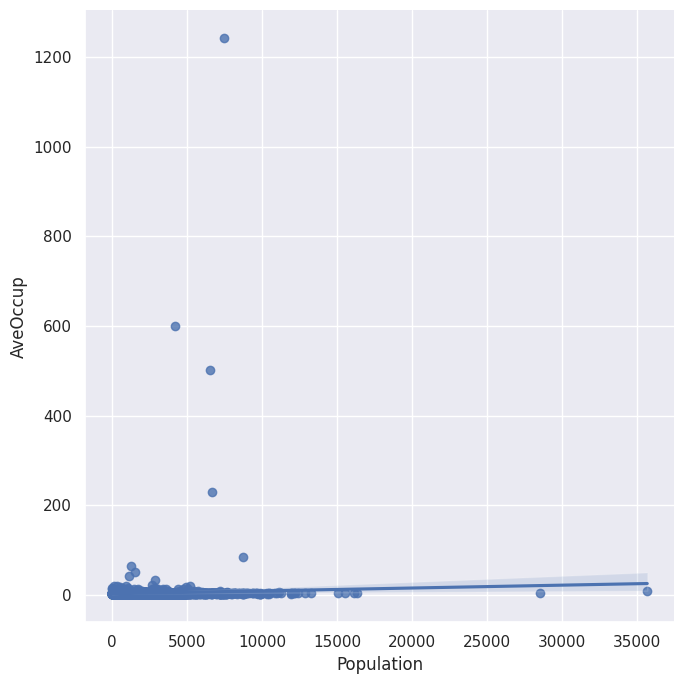

In [ ]:
sns.lmplot(x='Population',y='AveOccup',data=data,height=7)
plt.show()

# cahallenge scatter plot house price

Correlation between 'AveRooms' and 'price': 0.15194828974145774


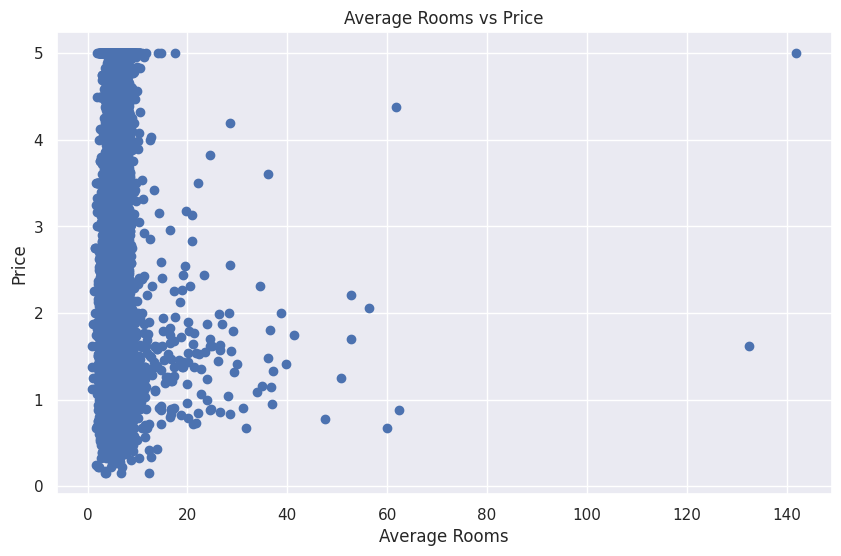

In [ ]:
nox_dis_corr = data['AveRooms'].corr(data['price'])
print("Correlation between 'AveRooms' and 'price':", nox_dis_corr)

plt.figure(figsize=(10, 6))
plt.title('Average Rooms vs Price')
plt.xlabel('Average Rooms')
plt.ylabel('Price')
plt.scatter(x=data['AveRooms'],y=data['price'])
plt.show()

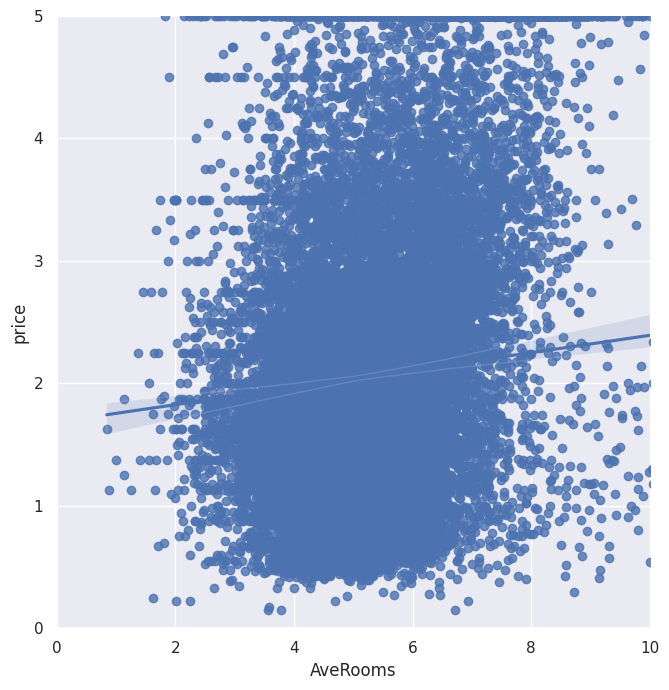

In [ ]:
sns.lmplot(x='AveRooms',y='price',data=data,height=7)
plt.xlim(0,10)
plt.ylim(0,5)
plt.show()

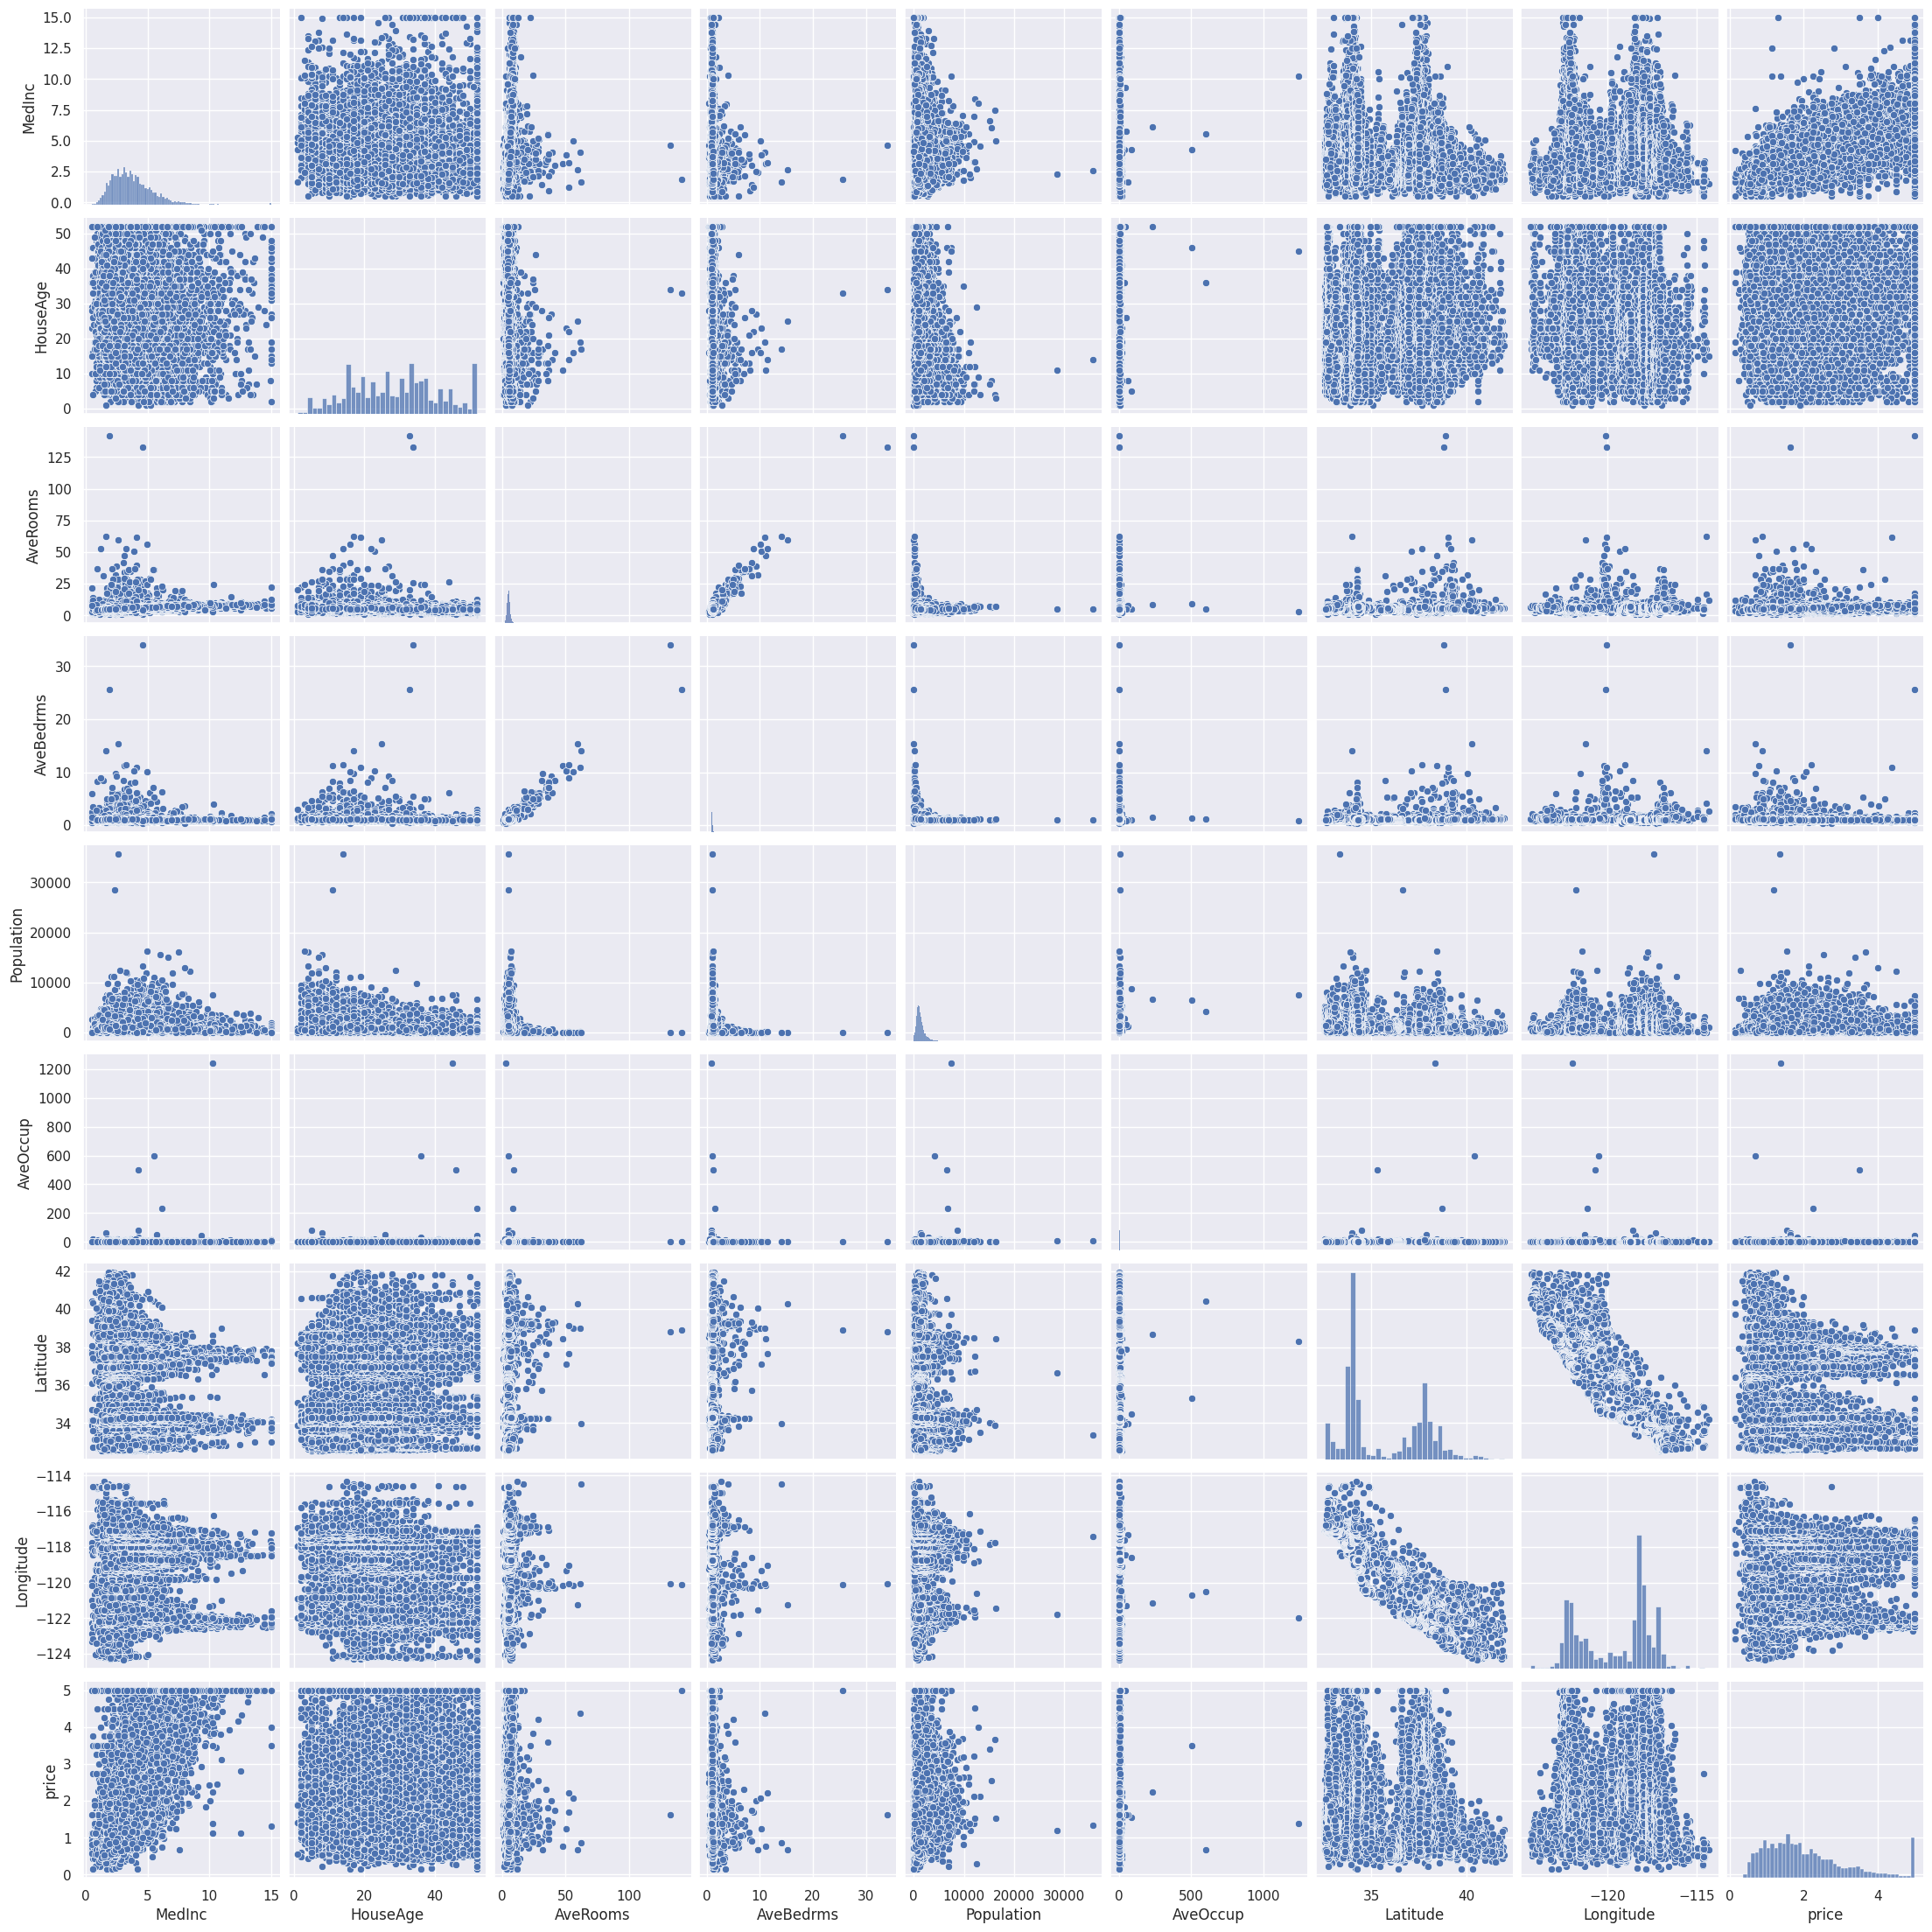

CPU times: user 51.5 s, sys: 344 ms, total: 51.8 s
Wall time: 58.7 s


In [ ]:
%%time

sns.pairplot(data)
plt.show()

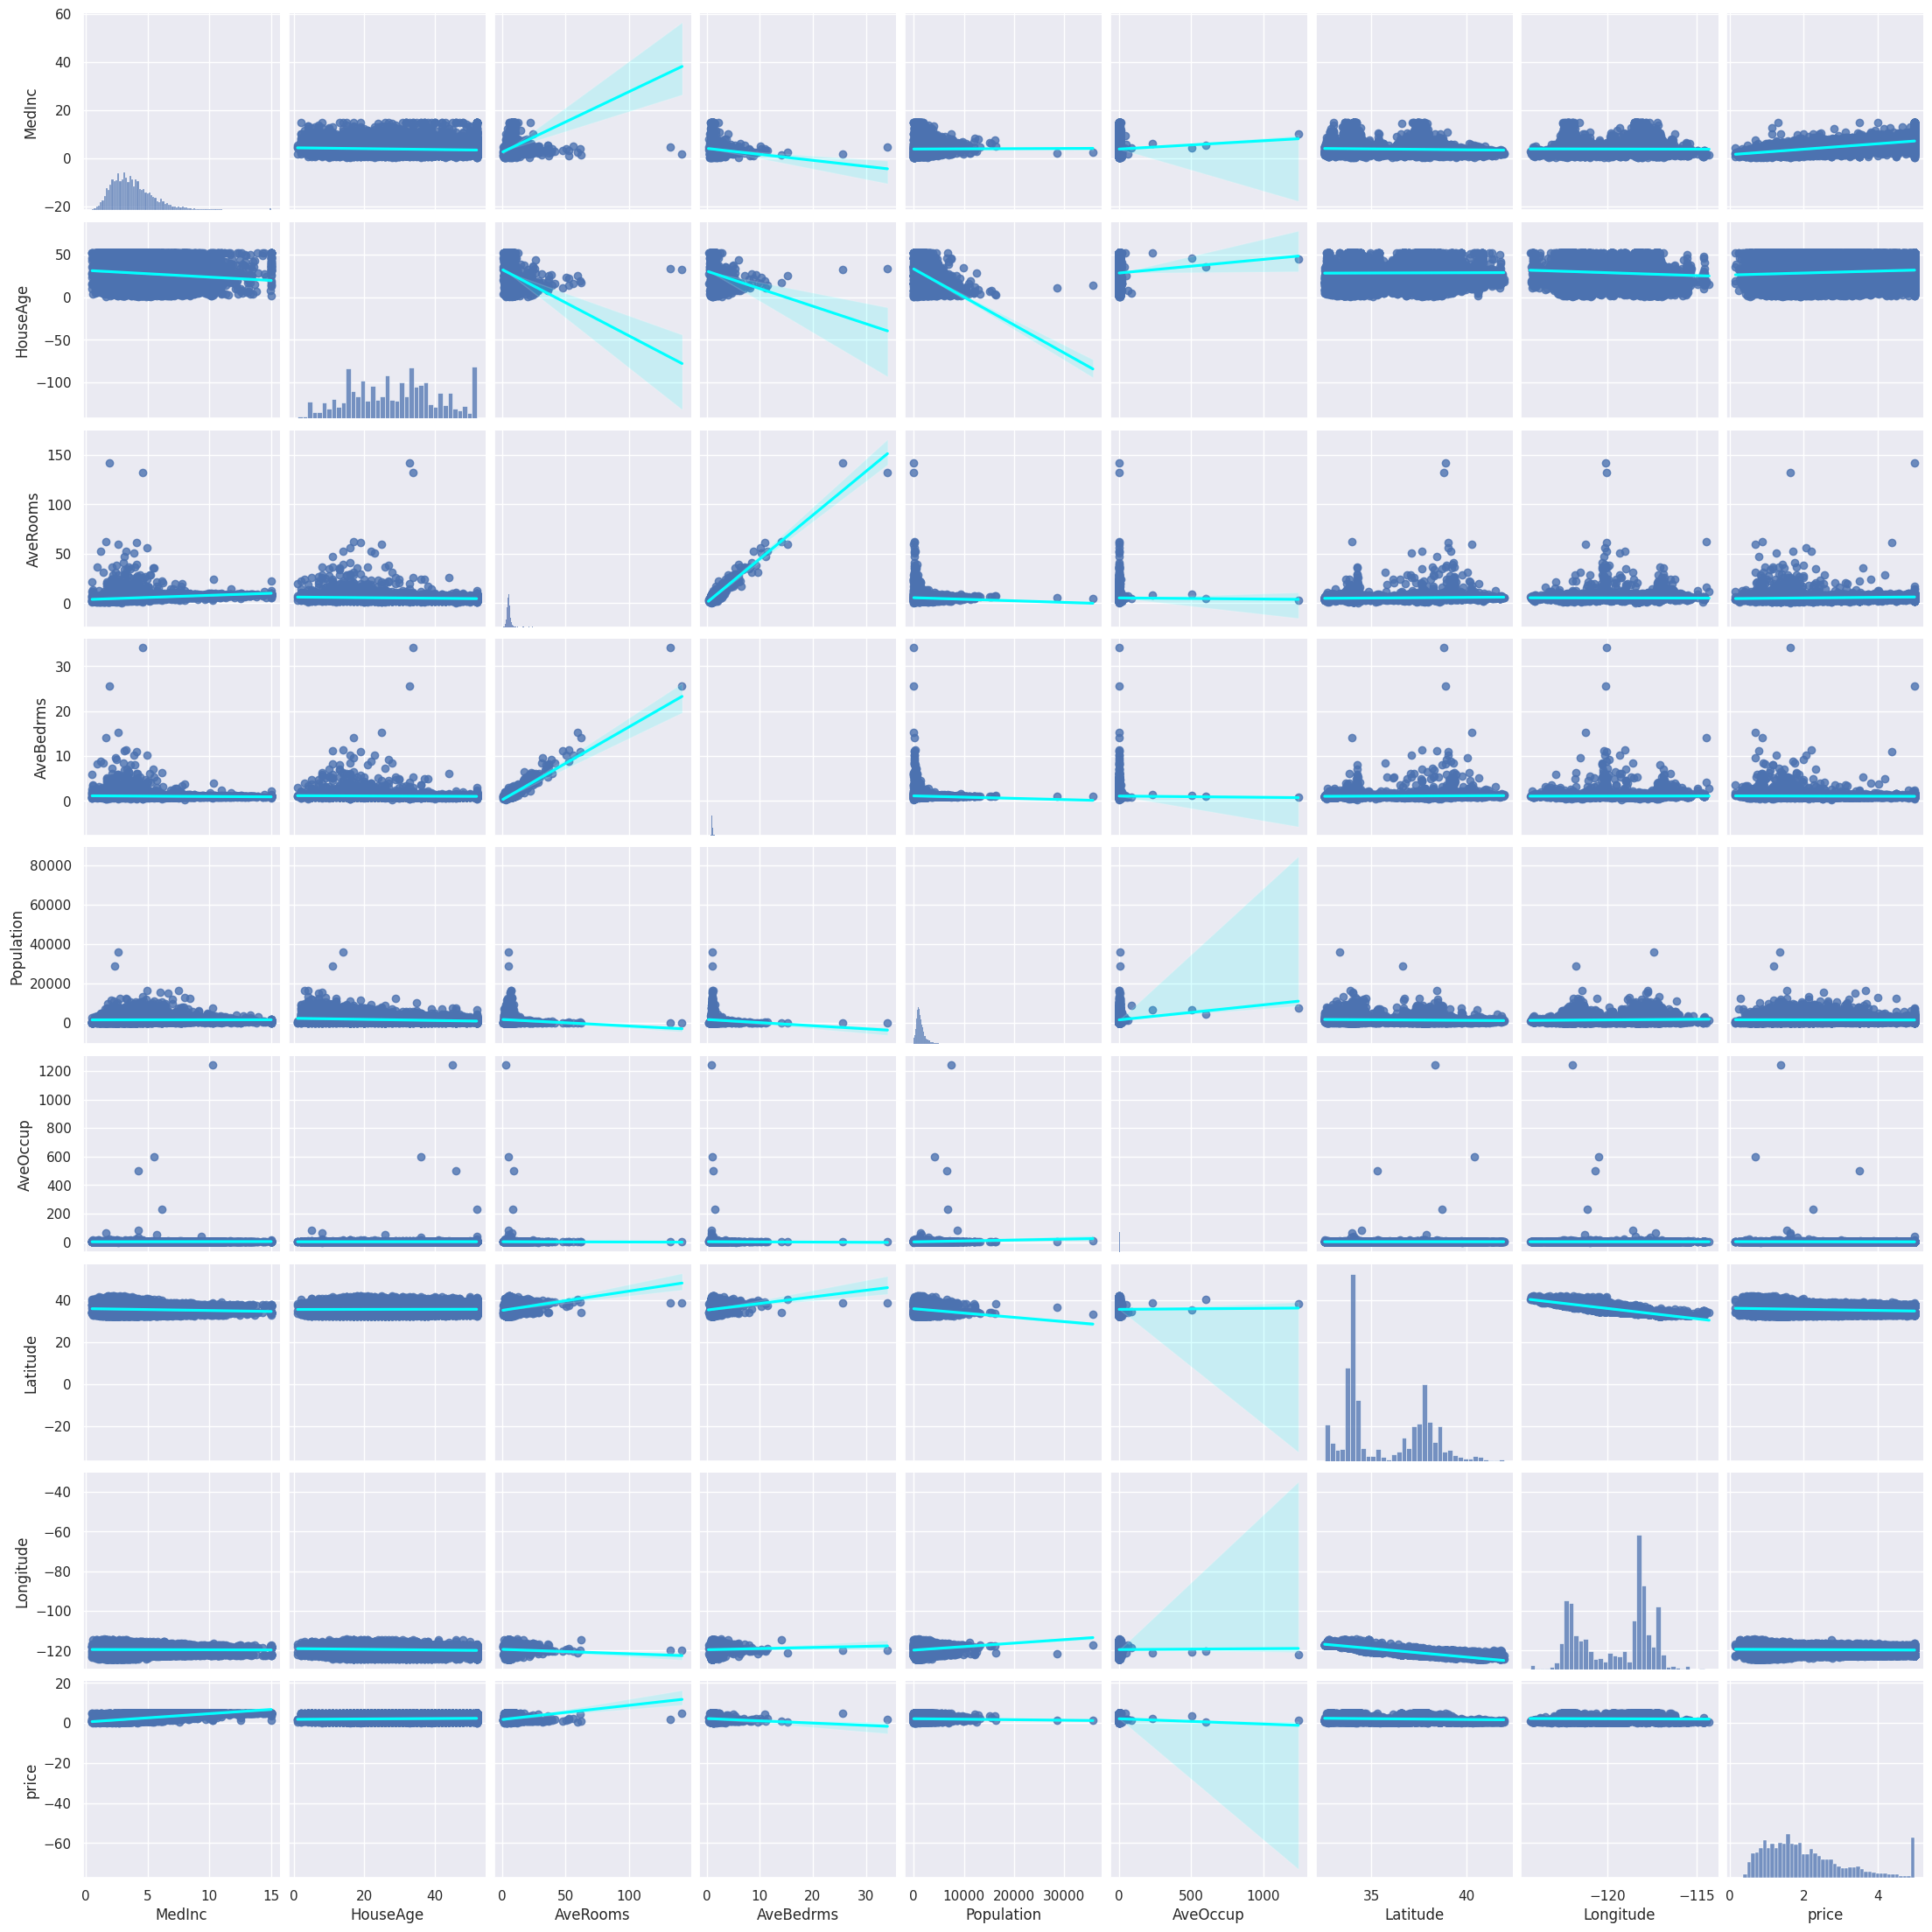

CPU times: user 2min 11s, sys: 446 ms, total: 2min 11s
Wall time: 2min 22s


In [ ]:
%%time

sns.pairplot(data,kind='reg',plot_kws={'line_kws':{'color':'cyan'}})
plt.show()

# training $ test dataset split

In [ ]:
prices=data['price']
features =data.drop('price',axis=1)

x_train,x_test,y_train,y_test=train_test_split(features,prices,test_size=0.2,random_state=10)

# of traing set
len(x_train)/len(features)

0.8

In [ ]:
x_test.shape[0]

4128

# ,ultivaableregresion

In [ ]:
regr = LinearRegression()
regr.fit(x_train,y_train)


# challenge print out r-squared for trangi ND EST datasetd
print('traing data r-squared : ', regr.score(x_train,y_train))
print('test data r-squared : ', regr.score(x_test,y_test))
print('intercept',regr.intercept_)
pd.DataFrame(regr.coef_,index=x_train.columns,columns=['coef'])

traing data r-squared :  0.6074049305021048
test data r-squared :  0.6009790143129111
intercept -37.48696576537286


,coef
MedInc,0.433102
HouseAge,0.009324
AveRooms,-0.100333
AveBedrms,0.615219
Population,-0.000003
AveOccup,-0.004782
Latitude,-0.429077
Longitude,-0.441484


# data transformation

In [ ]:
data['price'].skew()

np.float64(0.9777632739098345)

In [ ]:
from math import log
y_log=np.log(data['price'])
y_log.head()

,price
0,1.509839
1,1.276758
2,1.258745
3,1.227592
4,1.230225


In [ ]:
y_log.skew()

np.float64(-0.17317539032496646)

In [ ]:
y_log.skew()

np.float64(-0.17317539032496646)

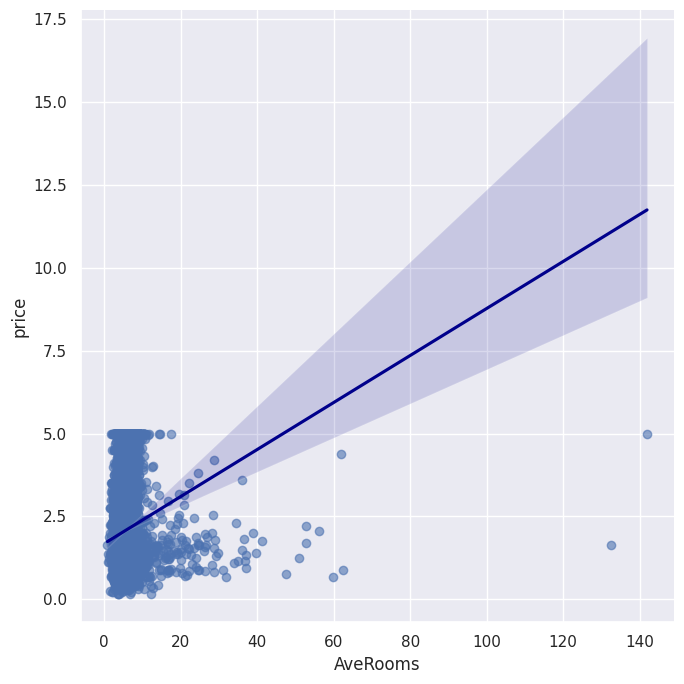

In [ ]:
sns.lmplot(x='AveRooms',y='price',data=data,height=7,scatter_kws={'alpha':0.6},line_kws={'color':'darkblue'})

plt.show()

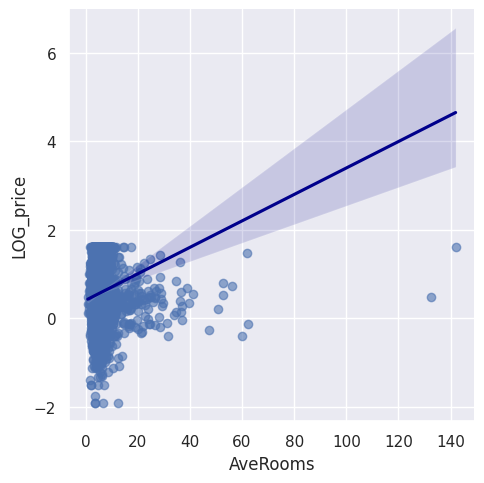

In [ ]:
transformed_data=features
transformed_data['LOG_price']=y_log
sns.lmplot(x='AveRooms',y='LOG_price',data=transformed_data,scatter_kws={'alpha':0.6},line_kws={'color':'darkblue'})
plt.show()

# regression using log ptices

In [ ]:
prices=np.log(data['price'])
features =data.drop('price',axis=1)

x_train,x_test,y_train,y_test=train_test_split(features,prices,test_size=0.2,random_state=10)

regr = LinearRegression()
regr.fit(x_train,y_train)


# challenge print out r-squared for trangi ND EST datasetd
print('traing data r-squared : ', regr.score(x_train,y_train))
print('test data r-squared : ', regr.score(x_test,y_test))
print('intercept',regr.intercept_)
pd.DataFrame(regr.coef_,index=x_train.columns,columns=['coef'])

traing data r-squared :  0.6168233836099826
test data r-squared :  0.6037489256704884
intercept -24.570490460846457


,coef
MedInc,0.186068
HouseAge,0.002279
AveRooms,-0.030865
AveBedrms,0.224873
Population,0.000008
AveOccup,-0.002259
Latitude,-0.289071
Longitude,-0.289146


# cahrles river propert

In [ ]:
np.e**0.18

1.1972173631218102

# p values and evaluationng cofficient

In [ ]:
x_incl_const = sm.add_constant(x_train)
model = sm.OLS(y_train,x_incl_const)
results = model.fit()
#results.params
#results.pvalues
#pd.dataFrame({'coef':results.params,'p-value':result.pvalues})
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.617
Method:                 Least Squares   F-statistic:                     3321.
Date:                Mon, 11 Aug 2025   Prob (F-statistic):               0.00
Time:                        10:06:04   Log-Likelihood:                -6190.1
No. Observations:               16512   AIC:                         1.240e+04
Df Residuals:                   16503   BIC:                         1.247e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -24.5705      0.359    -68.431      0.0

# testing for multicollinearity

$$ tax=\alpha _0 + \alpha _1 rm +\alpha _2 nox +...+ \alpha_{12}LSTAT   $$

$$ vif _{tax} = \frac{1}{(1 -R _{tax} ^2 )}$$

In [ ]:
variance_inflation_factor(exog=x_incl_const.values,exog_idx=1)
#type(x_incl_const)

np.float64(2.4741199441522226)

# challenge print out the colums inn x_inclu_const

In [ ]:
len(x_incl_const.columns)
x_incl_const.shape[1]

9

In [ ]:
# challenge write a for loop that prints all the vifs for all the features
vif=[]
for i in range(1,x_incl_const.shape[1]):
    vif.append(variance_inflation_factor(exog=x_incl_const.values,exog_idx=i))
print(vif)

[np.float64(2.4741199441522226), np.float64(1.2407811031054885), np.float64(8.87237661435907), np.float64(7.538102860339473), np.float64(1.1355969367025918), np.float64(1.0087303638271672), np.float64(9.383400327454687), np.float64(9.043759092819359)]


In [ ]:
# challenge write a for loop that prints all the vifs for all the features
vif=[variance_inflation_factor(exog=x_incl_const.values,
                               exog_idx=i)for i in range(x_incl_const.shape[1])]
pd.DataFrame({'coef_name':x_incl_const.columns,
              'vif':np.around(vif,2)})
#print(vif)

,coef_name,vif
0,const,17168.65
1,MedInc,2.47
2,HouseAge,1.24
3,AveRooms,8.87
4,AveBedrms,7.54
5,Population,1.14
6,AveOccup,1.01
7,Latitude,9.38
8,Longitude,9.04


In [ ]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


## model simplification & the bic

In [ ]:
x_incl_const =sm.add_constant(x_train)

model = sm.OLS(y_train,x_incl_const)
results = model.fit()

org_coef = pd.DataFrame({'coef': results.params,'p-value':round(results.pvalues,3)})

#challenge find both official docs for results
results.bic
results.rsquared

np.float64(12467.657146183055)

In [ ]:
x_incl_const =sm.add_constant(x_train)
x_incl_const=x_incl_const.drop('AveRooms',axis=1)
model = sm.OLS(y_train,x_incl_const)
results = model.fit()

coref_minus_averooms = pd.DataFrame({'coef': results.params,'p-value':round(results.pvalues,3)})

#challenge find both official docs for results
results.bic
results.rsquared

np.float64(0.6145854893817502)

In [ ]:
x_incl_const =sm.add_constant(x_train)
x_incl_const=x_incl_const.drop(['AveBedrms','AveRooms'],axis=1)
model = sm.OLS(y_train,x_incl_const)
results = model.fit()

reduced_coef = pd.DataFrame({'coef': results.params,'p-value':round(results.pvalues,3)})

#challenge find both official docs for results
results.bic
results.rsquared

np.float64(0.6088500404095489)

In [ ]:
frames=[org_coef,coref_minus_averooms,reduced_coef]
pd.concat(frames,axis=1)

,coef,p-value,coef,p-value,coef,p-value
const,-24.570490,0.000,-25.374726,0.0,-24.372965,0.000
MedInc,0.186068,0.000,0.169452,0.0,0.168988,0.000
HouseAge,0.002279,0.000,0.002373,0.0,0.002192,0.000
AveRooms,-0.030865,0.000,NaN,NaN,NaN,NaN
AveBedrms,0.224873,0.000,0.088216,0.0,NaN,NaN
Population,0.000008,0.001,0.000009,0.0,0.000006,0.015
AveOccup,-0.002259,0.000,-0.002302,0.0,-0.002315,0.000
Latitude,-0.289071,0.000,-0.301225,0.0,-0.290660,0.000
Longitude,-0.289146,0.000,-0.299851,0.0,-0.289227,0.000


## resiuals & residual pltos

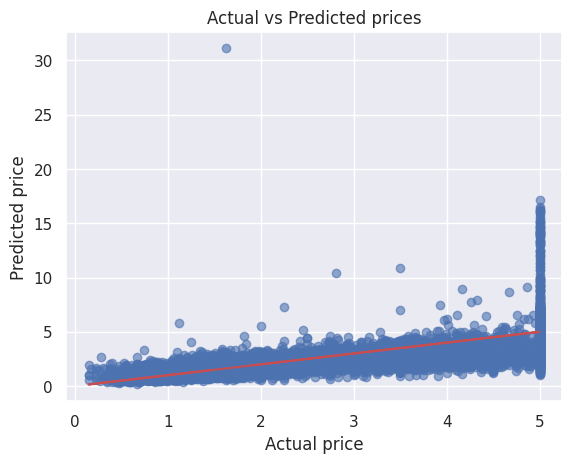

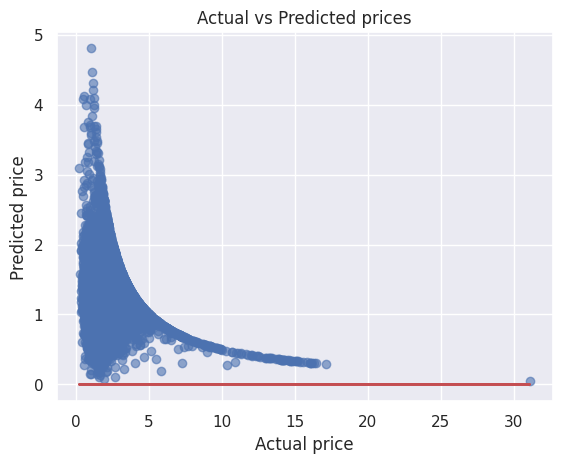

In [ ]:
prices=np.log(data['price'])
features =data.drop('price',axis=1)

x_train,x_test,y_train,y_test=train_test_split(features,prices,test_size=0.2,random_state=10)


# using sttsmodel
x_incl_const=sm.add_constant(x_train)
model = sm.OLS(y_train,x_incl_const)
results = model.fit()

#reidual
#residuals=y_train-results.fittedvalues
#type(residuals)


#results.resid

# graph of actual vs predicted prices
corr=round(y_train.corr(results.fittedvalues),2)
#corr
plt.scatter(x=np.e**y_train,y=np.e**results.fittedvalues,alpha=0.6)
plt.plot(np.e**y_train,np.e**y_train,'r')
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title('Actual vs Predicted prices')
plt.show()

# residual vs predicted prices
plt.scatter(x=np.e**results.fittedvalues,y=np.e**results.resid,alpha=0.6)
plt.plot(np.e**results.fittedvalues,np.zeros(len(results.fittedvalues)),'r')
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title('Actual vs Predicted prices')
plt.show()

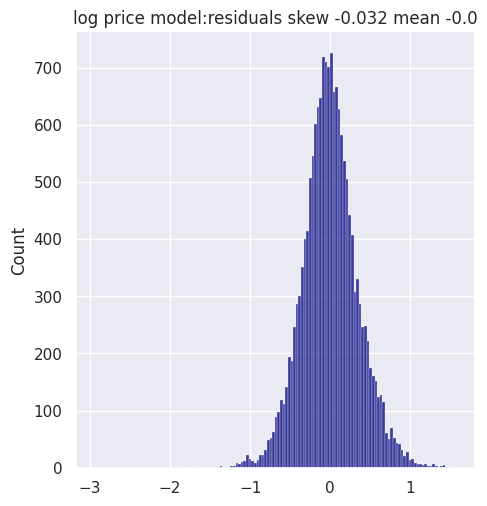

In [ ]:
# distribution of residuals (log prices) -chexking for normality
resid_mean=round(results.resid.mean(),3)
resid_skew =round(results.resid.skew(),3)

sns.displot(results.resid , color='navy')
plt.title(f'log price model:residuals skew {resid_skew} mean {resid_mean}')
plt.show()

# cahllenges : usig the original model with all the fetures and normal prices genrates:

# plot of actual vs predicted prices (incl.corealteion ) using a diffrent color

# plot of reiduals vs predicted prices
# plot of distribution of reiduals

# analyze the results

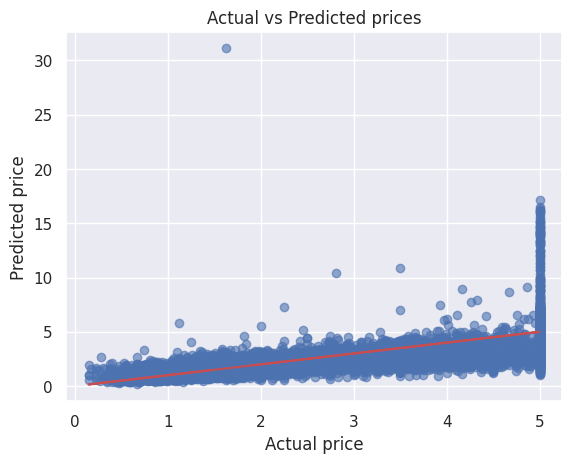

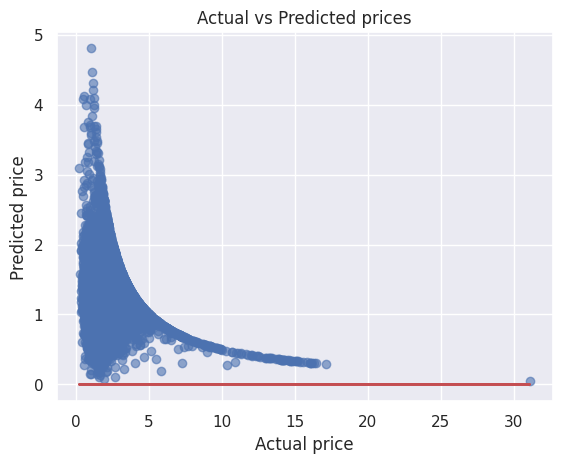

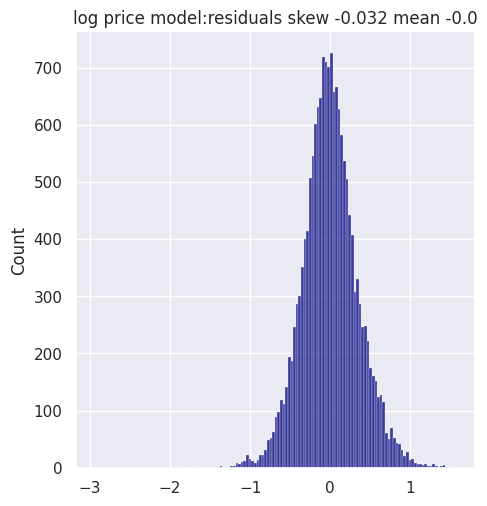

In [ ]:
#
prices=np.log(data['price'])
features =data.drop('price',axis=1)

x_train,x_test,y_train,y_test=train_test_split(features,prices,test_size=0.2,random_state=10)


x_incl_const=sm.add_constant(x_train)
model = sm.OLS(y_train,x_incl_const)
results = model.fit()


plt.scatter(x=np.e**y_train,y=np.e**results.fittedvalues,alpha=0.6)
plt.plot(np.e**y_train,np.e**y_train,'r')
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title('Actual vs Predicted prices')
plt.show()

# residual vs predicted prices
plt.scatter(x=np.e**results.fittedvalues,y=np.e**results.resid,alpha=0.6)
plt.plot(np.e**results.fittedvalues,np.zeros(len(results.fittedvalues)),'r')
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title('Actual vs Predicted prices')
plt.show()

# distribution of residuals (log prices) -chexking for normality
resid_mean=round(results.resid.mean(),3)
resid_skew =round(results.resid.skew(),3)

sns.displot(results.resid , color='navy')
plt.title(f'log price model:residuals skew {resid_skew} mean {resid_mean}')
plt.show()

# mean square error
reduced_log_mse =round (results.mse_resid,3)
reduced_log_rsquared = round(results.rsquared,3)

full_normal_mse =round (results.mse_resid,3)
full_normal_rsqaured= round(results.rsquared,3)

omitted_var_rsquared =round (results.mse_resid,3)
omitted_var_rsquared= round(results.rsquared,3)

In [ ]:
pd.DataFrame({'R-squuared':[reduced_log_rsquared,full_normal_rsqaured,omitted_var_rsquared],
              'mse':[reduced_log_mse, full_normal_mse,omitted_var_rsquared],
              'rmse':np.sqrt([reduced_log_mse, full_normal_mse,omitted_var_rsquared]) },
             index=['reduced log model', 'full normal price model','omitted var model'])

,R-squuared,mse,rmse
reduced log model,0.617,0.124,0.352136
full normal price model,0.617,0.124,0.352136
omitted var model,0.617,0.617,0.785493


In [ ]:
print('1 ls.d.in log prices is',np.sqrt(reduced_log_mse))
print('l2 s.d.in log prices is',2*np.sqrt(reduced_log_mse))

upper_bound=np.log(30) +2*np.sqrt(reduced_log_mse)
print(np.e**upper_bound *1000)
lower_bound=np.log(30) -2*np.sqrt(reduced_log_mse)
print(np.e**lower_bound *1000)

1 ls.d.in log prices is 0.35213633723318016
l2 s.d.in log prices is 0.7042726744663603
60671.25674197146
14834.042482877949


In [ ]:
30000 +np.e**(2*np.sqrt(reduced_log_mse))*1000

np.float64(32022.375224732383)

# California Housing Price Prediction and Analysis

This notebook performs an exploratory data analysis and builds a linear regression model to predict California housing prices based on the California Housing dataset.

## Table of Contents

- [1. Setup and Data Loading](#1-setup-and-data-loading)
- [2. Data Exploration](#2-data-exploration)
- [3. Data Cleaning and Preparation](#3-data-cleaning-and-preparation)
- [4. Data Visualization](#4-data-visualization)
- [5. Descriptive Statistics](#5-descriptive-statistics)
- [6. Correlation Analysis](#6-correlation-analysis)
- [7. Training and Testing Data Split](#7-training-and-testing-data-split)
- [8. Multivariable Regression](#8-multivariable-regression)
- [9. Data Transformation (Log Price)](#9-data-transformation-log-price)
- [10. Regression using Log Prices](#10-regression-using-log-prices)
- [11. P-values and Evaluating Coefficients](#11-p-values-and-evaluating-coefficients)
- [12. Testing for Multicollinearity (VIF)](#12-testing-for-multicollinearity-vif)
- [13. Model Simplification & BIC](#13-model-simplification--bic)
- [14. Residuals & Residual Plots](#14-residuals--residual-plots)
- [15. Model Evaluation Metrics (MSE, R-squared, RMSE)](#15-model-evaluation-metrics-mse-r-squared-rmse)

## 1. Setup and Data Loading

The necessary libraries are imported and the California Housing dataset is loaded using `sklearn.datasets.fetch_california_housing`.

## 2. Data Exploration

The structure and contents of the loaded dataset are examined.

## 3. Data Cleaning and Preparation

Missing values are checked, and the data types are inspected. A pandas DataFrame is created from the dataset, and the target variable 'price' is added as a column.

## 4. Data Visualization

Histograms and distribution plots are generated to visualize the distribution of features and the target variable. Scatter plots and joint plots are used to explore the relationships between different variables, including the relationship between 'Population' and 'AveOccup', and 'AveRooms' and 'price'. Pair plots are generated to visualize the relationships between all pairs of features.

## 5. Descriptive Statistics

Basic descriptive statistics (min, max, mean, describe) are calculated for the dataset.

## 6. Correlation Analysis

Correlation coefficients between different variables are calculated, and a heatmap is generated to visualize the correlation matrix.

## 7. Training and Testing Data Split

The data is split into training and testing sets for model building and evaluation.

## 8. Multivariable Regression

A linear regression model is trained on the training data, and the R-squared values for the training and testing sets are calculated to assess the model's performance. The intercept and coefficients of the model are also displayed.

## 9. Data Transformation (Log Price)

The target variable 'price' is transformed using a natural logarithm to address skewness in the distribution. The skewness of the transformed target variable is checked.

## 10. Regression using Log Prices

A linear regression model is trained using the log-transformed prices as the target variable. The R-squared values and model coefficients are examined.

## 11. P-values and Evaluating Coefficients

An OLS model is built using `statsmodels` to obtain detailed regression results, including p-values for each coefficient to assess their statistical significance.

## 12. Testing for Multicollinearity (VIF)

The Variance Inflation Factor (VIF) is calculated for each feature to detect multicollinearity in the model.

## 13. Model Simplification & BIC

The Bayesian Information Criterion (BIC) and R-squared values are used to compare different models with varying sets of features, exploring model simplification by removing features.

## 14. Residuals & Residual Plots

Residuals are calculated, and plots of actual vs. predicted prices and residuals vs. predicted prices are generated to evaluate the model's assumptions and identify potential issues. A distribution plot of the residuals is also created to check for normality.

## 15. Model Evaluation Metrics (MSE, R-squared, RMSE)

Mean Squared Error (MSE), R-squared, and Root Mean Squared Error (RMSE) are calculated for different models to compare their performance. The implications of the standard deviation of the residuals in the log-transformed model are explored.